<a href="https://colab.research.google.com/github/sonasejidli/Implementation-of-K-Means-Clustering-in-Python/blob/main/Copy_of_Implementation_of_K_Means_Clustering_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Implementation of K-Means Clustering in Python***

Example *1*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
X,y = load_iris(return_X_y=True)

In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range (1,11):
  km = KMeans(n_clusters=k, random_state=2)
  km.fit(X)
  sse.append(km.inertia_)

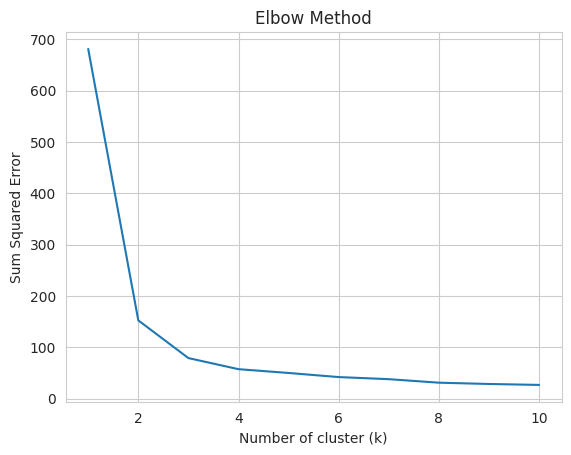

In [ ]:
sns.set_style('whitegrid')
g=sns.lineplot(x=range(1,11),y=sse)

g.set(xlabel = 'Number of cluster (k)',
  ylabel = 'Sum Squared Error',
  title = 'Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
pred = kmeans.predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
new_pred = []
for x in pred:
  if x == 1:
    new_pred.append(0)
  elif x == 0:
    new_pred.append(1)
  else :
    new_pred.append(x)

new_pred = np.array(new_pred)
new_pred





array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

0.8933333333333333

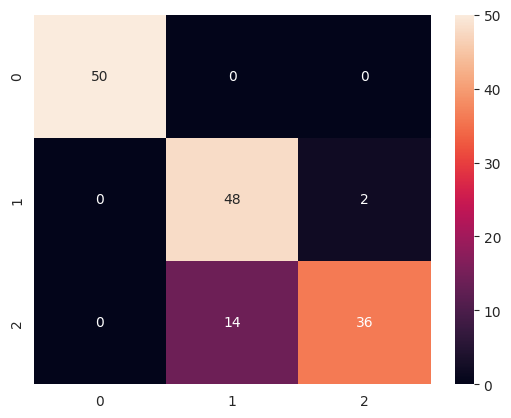

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from seaborn import heatmap
conf = confusion_matrix(y,new_pred)
heatmap(conf, annot=True)
accuracy_score(y,new_pred)


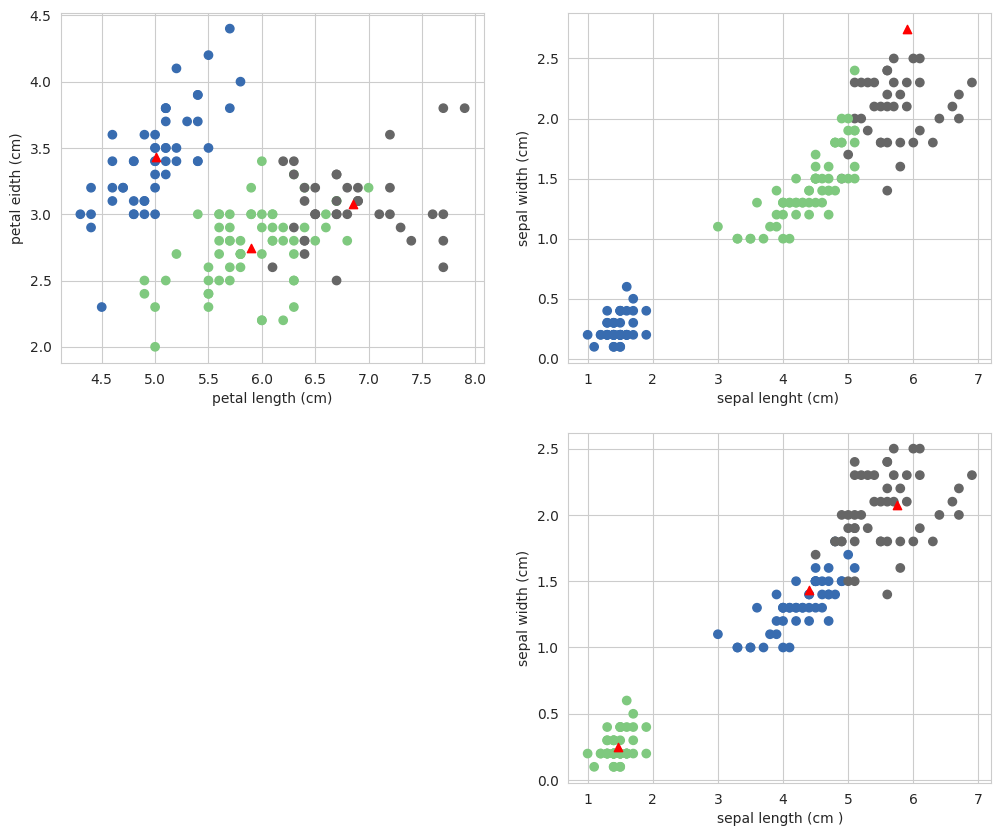

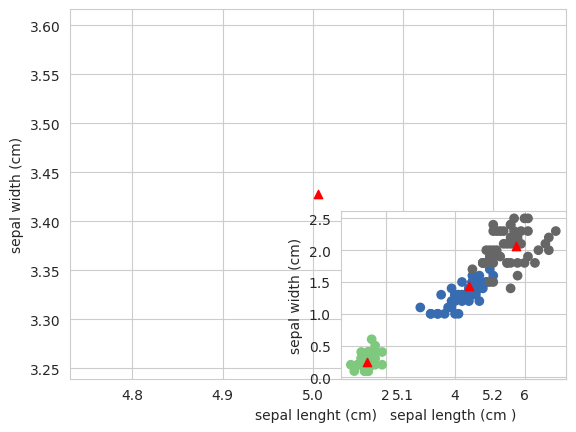

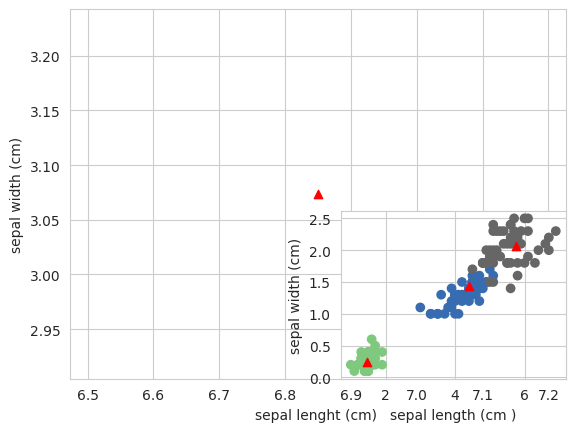

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
  center = center[:2]
  plt.scatter(center[0],center[1],marker = "^", c = 'red')
plt.xlabel ('petal length (cm)')
plt.ylabel ('petal eidth (cm)')

plt.subplot(2,2,2)
plt.scatter(X[:,2], X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
plt.grid(True)
for center in kmeans.cluster_centers_:
  center = center[:2]
  plt.scatter(center[0],center[1],marker = '^', c = 'red')
  plt.xlabel ('sepal lenght (cm) ' )
  plt.ylabel ('sepal width (cm)')

  plt.subplot(2,2,4)
  plt.scatter(X[:,2], X[:,3], c= y , cmap=cm.Accent)
  plt.grid(True)
  for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1], marker = '^', c = 'red')
  plt.xlabel ('sepal length (cm )')
  plt.ylabel('sepal width (cm)')
  plt.show()